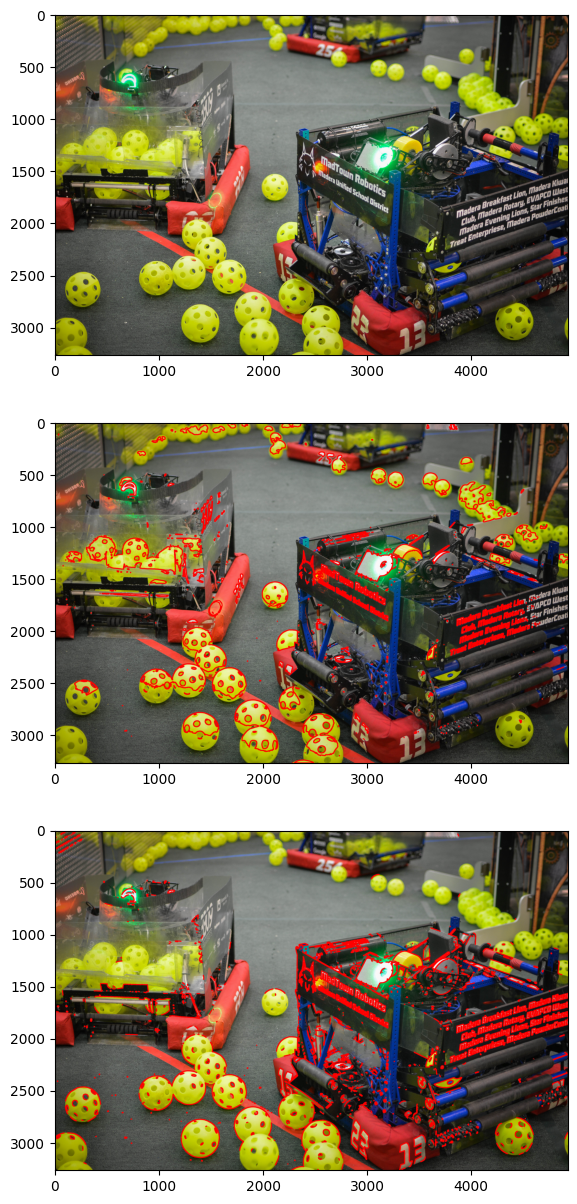

In [1]:
import numpy as np

import cv2

import matplotlib.pyplot as plt

image = cv2.imread('ballsFRC.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imgray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

imgray = cv2.GaussianBlur(imgray,(7,7),0)

image_base = np.copy(image)

# Draw contours with binarised image

ret, thresh = cv2.threshold(imgray, 180, 180, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_countours = cv2.drawContours(image_base, contours, -1, (255,0,0), 10)

# Draw contours with Canny Edge Detection

image_base = np.copy(image)

edged = cv2.Canny(imgray, 180, 150)

contours2, hierarchy = cv2.findContours(edged,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

img_countours2 = cv2.drawContours(image_base, contours2, -1, (255,0,0), 10)
f, axarr = plt.subplots(3,1,figsize=(15, 15))

axarr[0].imshow(image)

axarr[1].imshow(img_countours, cmap='gray')

axarr[2].imshow(img_countours2, cmap='gray')

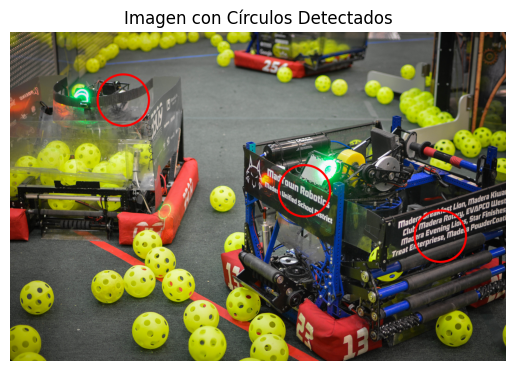

In [85]:
image = cv2.imread('ballsFRC.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
circles = cv2.HoughCircles(
    imgray,
    cv2.HOUGH_GRADIENT,
    dp=450,
    minDist=100,  # Ajustar la distancia mínima según su imagen
    param1=600,
    param2=100,
    minRadius=int(120),  # Convertir 3.5 km a metros
    maxRadius=int(500)
)
if circles is not None:
    circles = np.uint16(np.around(circles)) # type: ignore

    for circle in circles[0, :]:# type: ignore
        x, y, r = circle
        # Dibujar el círculo en la imagen original
        cv2.circle(image, (x, y), r, (255, 0, 0), 20)  # Color verde, grosor 2

    # Convertir la imagen BGR a RGB (necesario para plt.imshow)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con los círculos usando plt.imshow
    plt.imshow(image)
    plt.axis('off')  # Desactivar ejes en la trama
    plt.title('Imagen con Círculos Detectados')
    plt.show()
else:
    print("No se detectaron círculos.")